In [8]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
plt.style.use('ggplot')

In [51]:
df = pd.read_csv("C://Users/annad/OneDrive/Documents/JNote/animes90to23.csv")

In [4]:
rating_df = pd.read_csv("C://Users/annad/OneDrive/Documents/JNote/rating.csv")

## Filtering the Anime df

While having a large data set is often good, there are many obscure entries that would be unavailable to watch online or wouldn't be of interest to the vast majority of viewers. These obscure shows also are more likely to be missing a synopsis, reviews, and ratings. For simplicity this project will only be considering TV shows and movies with 10,000+ members. This leaves 3657 entries.

In [54]:
df[df['media_type'].isin(['tv', 'movie'])].loc[df['num_list_users'] >= 10000].reset_index()

,index,Unnamed: 0,anime_id,anime_name,anime_start_year,synopsis,num_list_users,nsfw,num_episodes,rating,media_type,genre1,genre2,genre3,genre4,genre5,genre6,genre7
0,0,0,895,Dragon Ball Z Movie 02: Kono Yo de Ichiban Tsu...,1990,"In his laboratory, biotechnology expert Dr. Ko...",111205,white,1,pg_13,movie,Action,Adventure,Comedy,Fantasy,Sci-Fi,Shounen,na
1,2,2,1375,Watashi no Ashinaga Ojisan,1990,Daddy Long Legs is based on the novel of the s...,16367,white,40,g,tv,Comedy,Historical,Romance,School,Slice of Life,na,na
2,3,3,1261,Kyattou Ninden Teyandee,1990,"In the city of Edoropolis, hundreds of mechani...",13370,white,54,g,tv,Action,Anthropomorphic,Comedy,Mecha,Sci-Fi,Super Power,na
3,4,4,951,Chibi Maruko-chan,1990,Momoko Sakura is an elementary school student ...,11986,white,142,g,tv,Comedy,Shoujo,Slice of Life,na,na,na,na
4,47,47,1251,Fushigi no Umi no Nadia,1990,"In 1889, the world is on the pinnacle of great...",66330,white,39,pg_13,tv,Adventure,Comedy,Historical,Romance,Sci-Fi,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3653,16671,16671,55894,Bokura no Ameiro Protocol,2023,Shun Tokinoya is a second-year high school stu...,12749,white,0,na,tv,Action,Video Game,na,na,na,na,na
3654,16672,16672,39167,Girls & Panzer: Saishuushou Part 4,2023,The fourth film in the six-part Girls & Panzer...,12462,white,1,pg_13,movie,Military,School,na,na,na,na,na
3655,16673,16673,55153,Yuzuki-san Chi no Yonkyoudai.,2023,"The Yuzuki family, which consists of four brot...",13278,white,12,pg_13,tv,School,Shoujo,Slice of Life,na,na,na,na
3656,16674,16674,54041,16bit Sensation: Another Layer,2023,Konoha Akisato is an illustrator who loves bea...,14106,white,13,pg_13,tv,Adult Cast,Comedy,Otaku Culture,Time Travel,Workplace,na,na


## Histogram of user ratings

Ignoring the -1 (N/A) ratings shows that the histogram is very left skewed. There are few ratings that have scores less than 4 and users tend to give ratings between 7 and 10.

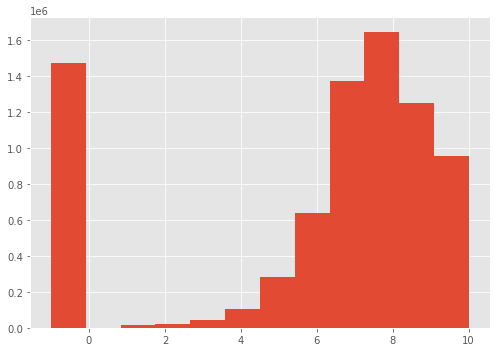

In [22]:
axs = plt.subplots(1, 1, figsize =(7, 5), 
                        tight_layout = True)

plt.hist(rating_df["rating"], bins= 12)
plt.show()